In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

In [2]:
lvf_x0 = np.genfromtxt('data/linear_vectorfield_data_x0.txt', dtype="double")
lvf_x1 = np.genfromtxt('data/linear_vectorfield_data_x1.txt', dtype="double")

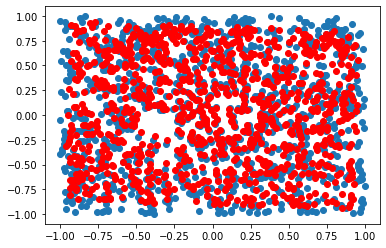

In [3]:
x0_x, x0_y = lvf_x0.T
x1_x, x1_y = lvf_x1.T

plt.scatter(x0_x,x0_y)
plt.scatter(x1_x,x1_y,color='r')
plt.show()

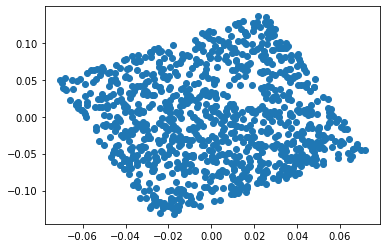

In [4]:
x_diff = x1_x - x0_x
y_diff = x1_y - x0_y

plt.scatter(x_diff, y_diff)
plt.show()

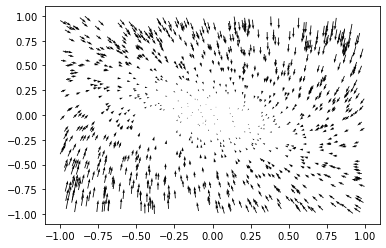

In [5]:
plt.quiver(x0_x, x0_y, x_diff, y_diff)
plt.show()

In [6]:
def least_square(x,y):
    x = np.vstack([x, np.ones(len(y))]).T
    return LA.lstsq(x, y, rcond=None)[0]

In [7]:
def approximate(x0, y0, x1, y1, x_diff, y_diff, t=1):

    x_m, x_c = least_square(x0, x_diff)
    y_m, y_c = least_square(y0, y_diff)
    fx = np.polyval([x_m, x_c], x0)
    fy = np.polyval([y_m, y_c], y0)
    
    ep_x, ep_y = evaluate(x_m, y_m, x0, y0, x_c, y_c, t)
    mse = np.mean(np.sqrt(np.square(ep_x - x1) + np.square(ep_y - y1)))

    return x_m, y_m, x_c, y_c, fx, fy, mse

In [8]:
def evaluate(x_m, y_m, x, y, x_c, y_c, t=1):
    
    f_x = np.polyval([x_m, x_c], x)*t + x

    f_y = np.polyval([y_m, y_c], y)*t + y
    
    return f_x, f_y

In [9]:
def mse(x0x, x0y, mx, my, cx, cy, t=1):

    ep_x, ep_y = evaluate(mx, my, x0x, x0y, t)

    return np.mean(np.sqrt(np.square(ep_x - x1x) + np.square(ep_y - x1y))) 

In [10]:
x_m, y_m, x_c, y_c, fx, fy, mse = approximate(x0_x, x0_y, x1_x, x1_y, x_diff, y_diff)

print(mse)

0.027557827015297486


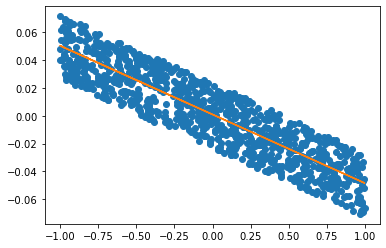

In [11]:
plt.plot(x0_x, x_diff, 'o')
plt.plot(x0_x, fx)
plt.show()

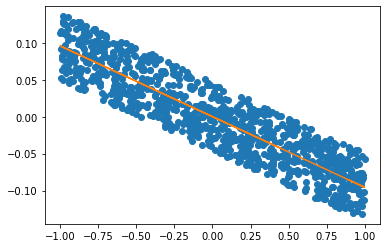

In [12]:
plt.plot(x0_y, y_diff, 'o')
plt.plot(x0_y, fy)
plt.show()

In [13]:
dt = np.linspace(0.0001, 10, 10000)

losses = []

min_loss = 1000000
min_dt = -1

for i in dt:
    x_m, y_m, x_c, y_c, fx, fy, loss = approximate(x0_x, x0_y, x1_x, x1_y, x_diff/i, y_diff/i)
#     loss = mse(x0x, x0y, mx, my, cx, cy)
    losses.append(loss)
    if loss < min_loss:
        min_loss = loss
        min_dt = i

print(min_loss, " - ", min_dt)

0.027556278453098874  -  1.0051904590459046


In [14]:
t = 0.1

xd = (x1_x-x0_x)/min_dt
yd = (x1_y-x0_y)/min_dt

x_m, y_m, x_c, y_c, fx, fy, loss = approximate(x0_x, x0_y, x1_x, x1_y, xd, yd, t)

print(loss)


0.05856682114045756


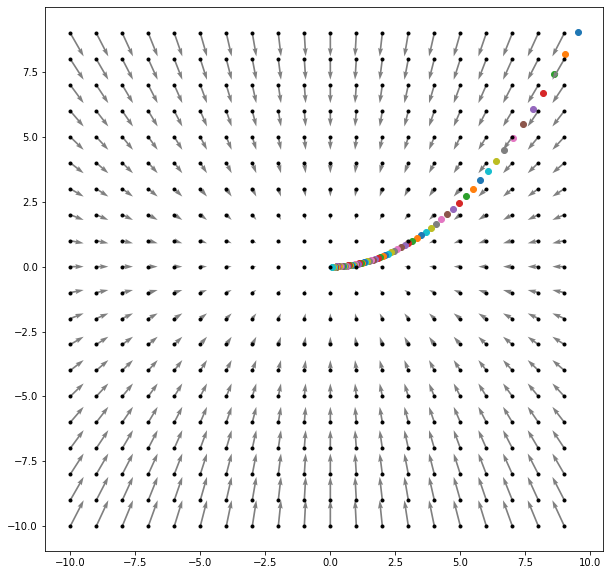

In [15]:
x0_x = [10]
x0_y = [10]

tt = np.linspace(1, 100, 100)

fig = plt.figure(figsize=(10,10))

for i in tt:
    ep_x, ep_y = evaluate(x_m, y_m, x0_x, x0_y, x_c, y_c, t=1)
    
    x0_x = ep_x
    x0_y = ep_y
    
    plt.scatter(ep_x, ep_y)

x0xp = np.arange(-10, 10, 1)
x0yp = np.arange(-10, 10, 1)
xx, yy = np.meshgrid(x0xp, x0yp)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

ep_xp, ep_yp = evaluate(x_m, y_m, xx, yy, x_c, y_c, t=1)
    
xdp = ep_xp-xx
ydp = ep_yp-yy   

plt.quiver(xx, yy, xdp, ydp, color='grey')
    
plt.show()